In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('BA_data.csv', encoding='latin1')

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe(include="all")

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
import matplotlib.pyplot as plt

In [10]:
!pip install seaborn
import seaborn as sns

In [11]:
df_encoded = df.copy()
label_encoders = {}

In [12]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

In [13]:
X = df_encoded.drop("booking_complete", axis=1)
y = df_encoded["booking_complete"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight="balanced"
)
rf_model.fit(X_train, y_train)

print("🎯 New Class Distribution (Train):")
print(y_train.value_counts())

🎯 New Class Distribution (Train):
booking_complete
0    34018
1     5982
Name: count, dtype: int64


In [16]:
y_pred = rf_model.predict(X_test)

In [17]:
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.8524

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.54      0.09      0.15      1496

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.53     10000
weighted avg       0.81      0.85      0.80     10000



In [18]:
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

C:\Users\naren\AppData\Local\Temp\ipykernel_37868\269227538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


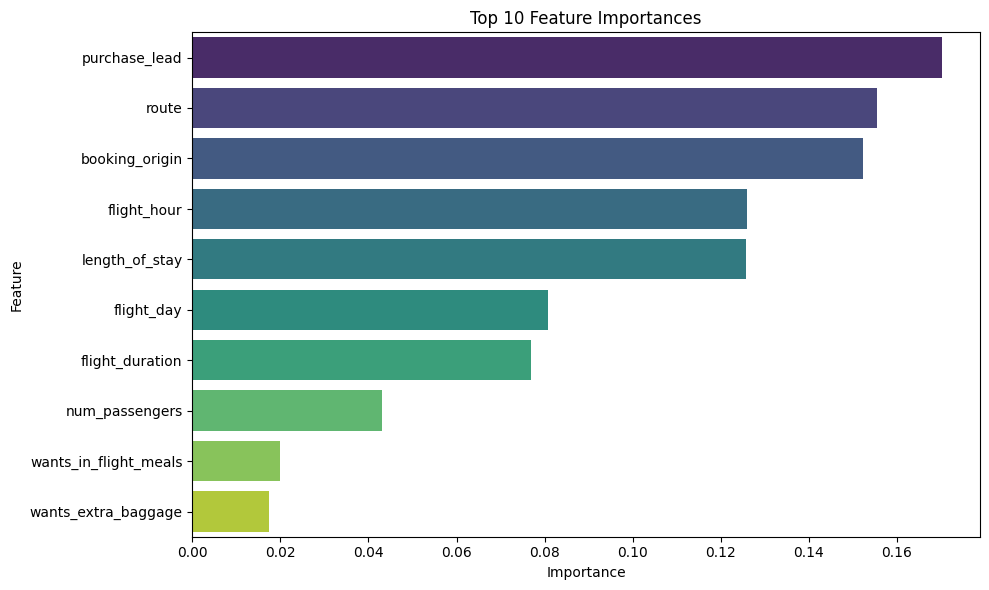

In [19]:
# Plot Feature Importances - Warning-free
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_imp.head(10),
    x="Importance",
    y="Feature",
    hue=None,              # Fix for deprecation
    legend=False,          # Avoid extra legend
    palette="viridis"
)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [20]:
# Debug: Print top 10 importances
print(feat_imp.head(10))


                  Feature  Importance
3           purchase_lead    0.170343
7                   route    0.155432
8          booking_origin    0.152374
5             flight_hour    0.126015
4          length_of_stay    0.125769
6              flight_day    0.080786
12        flight_duration    0.077004
0          num_passengers    0.043032
11  wants_in_flight_meals    0.019982
9     wants_extra_baggage    0.017475


In [21]:
print(rf_model.feature_importances_)

[0.04303224 0.01375172 0.00232708 0.17034309 0.12576892 0.12601478
 0.08078642 0.15543185 0.15237423 0.01747459 0.01570906 0.01998216
 0.07700386]


C:\Users\naren\AppData\Local\Temp\ipykernel_37868\62051454.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


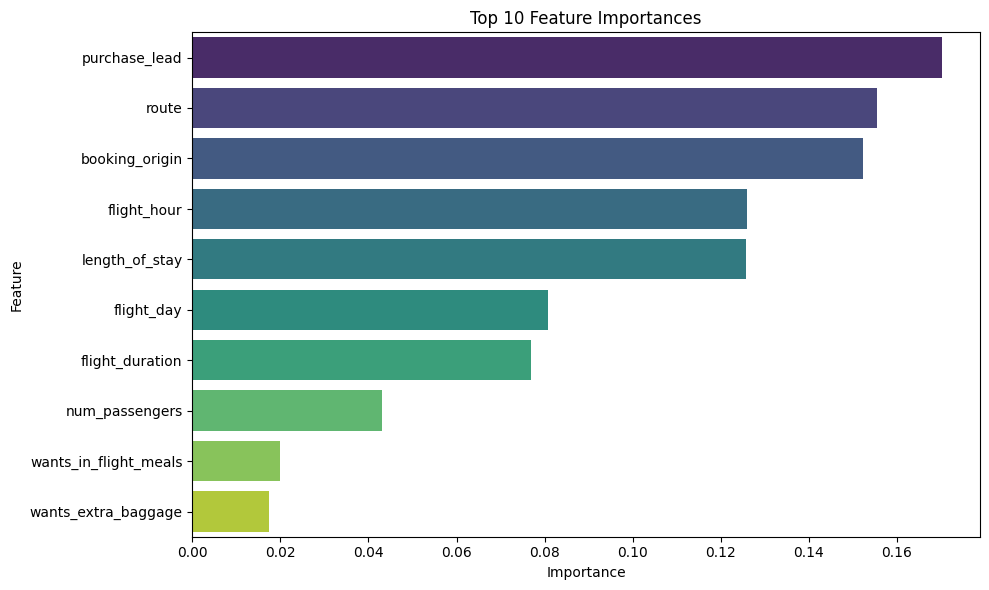

In [22]:
# Recheck feature importance generation
importances = rf_model.feature_importances_

# Ensure it's valid
if (importances == 0).all():
    print("⚠️ All feature importances are zero. Something is wrong.")
else:
    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Plot
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=feat_imp.head(10),
        x="Importance",
        y="Feature",
        palette="viridis",
        hue=None,
        legend=False
    )
    plt.title("Top 10 Feature Importances")
    plt.tight_layout()
    plt.show()


In [23]:
print(y.value_counts(normalize=True))

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64


In [24]:
!pip install -U scikit-learn imbalanced-learn

  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_smote.value_counts())

# Fit the model again
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)


After SMOTE: booking_complete
0    34018
1    34018
Name: count, dtype: int64


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [27]:
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")

✅ Accuracy: 0.7127


In [28]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 16.8 MB/s eta 0:00:09
   - -------------------------------------- 5.8/150.0 MB 16.8 MB/s eta 0:00:09
   -- ------------------------------------- 9.4/150.0 MB 16.8 MB/s eta 0:00:09
   --- ------------------------------------ 12.8/150.0 MB 16.8 MB/s eta 0:00:09
   ---- ----------------------------------- 16.5/150.0 MB 17.1 MB/s eta 0:00:08
   ----- ---------------------------------- 20.2/150.0 MB 17.0 MB/s eta 0:00:08
   ------ --------------------------------- 23.9/150.0 MB 17.0 MB/s eta 0:00:08
   ------- -------------------------------- 27.5/150.0 MB 16.9 MB/s eta 0:00:08
   -------- ------------------------------- 30.9/150.0 MB 16.9 MB/s eta 0:00:08
   --------- ------------------------------ 34.6/150.0 MB 16.9 MB/s eta 0:00:07
   ---------- ----------------------------- 38.5/150.0 MB 17.1 MB/s eta 0:00:07
   ----------- ---------------------------- 42.2/150

In [30]:
weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

c:\Users\naren\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
from sklearn.metrics import precision_recall_curve

y_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Try a threshold other than 0.5
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)


In [33]:
print(f"✅ Accuracy with custom threshold: {accuracy_score(y_test, y_pred_custom):.4f}")

✅ Accuracy with custom threshold: 0.6900


In [41]:
from sklearn.metrics import confusion_matrix

threshold = 0.9

y_pred = (rf_model.predict_proba(X_test)[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[8482   22]
 [1463   33]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.60      0.02      0.04      1496

    accuracy                           0.85     10000
   macro avg       0.73      0.51      0.48     10000
weighted avg       0.82      0.85      0.79     10000



In [43]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc:.4f}")


ROC-AUC: 0.7613
